In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
fifa = pd.read_csv('fifa_data.csv')
fifa.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


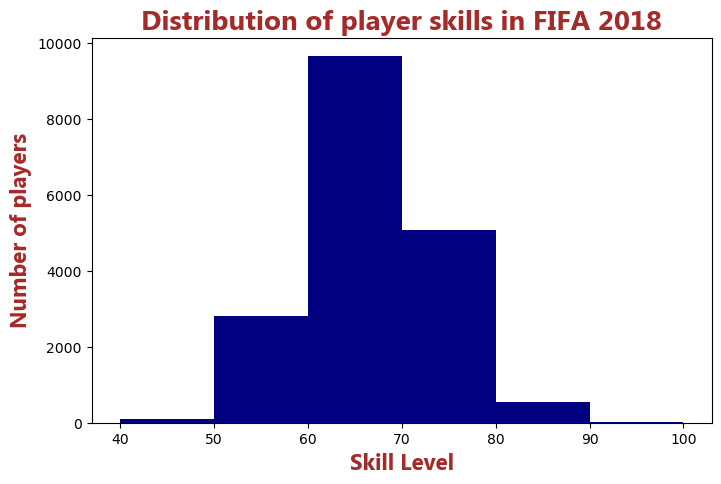

In [21]:
bins = [40,50,60,70,80,90,100]
plt.figure(figsize=(8,5))
plt.hist(fifa.Overall, bins=bins, color='navy')
plt.xticks(bins)

plt.ylabel("Number of players", fontdict={'fontname':'Myanmar Text', 'fontsize':16, 'color':'brown', 'fontweight':'bold'})
plt.xlabel("Skill Level", fontdict={'fontname':'Myanmar Text', 'fontsize':16, 'color':'brown', 'fontweight':'bold'})
plt.title("Distribution of player skills in FIFA 2018", fontdict={'fontname':'Myanmar Text', 'fontsize':20, 'color':'brown', 'fontweight':'bold'})

plt.show()